# Unmasking the Force: A Data Scientist's Guide to Jedi and Sith Identification

Every whisper of the Force, every clash of a lightsaber, leaves a data signature. As data scientists, we are the galaxy's most meticulous detectives, tasked with sifting through these digital echoes to reveal the truth. Our current assignment? To distinguish between the noble Jedi and the treacherous Sith based on their inherent characteristics.

## The Case Files: Gathering Our Evidence

Our investigation begins with two crucial case files: <span style="background-color:rgb(214, 214, 214); color:rgb(128, 128, 128);">*Train_knight.csv*</span> and <span style="background-color:rgb(214, 214, 214); color:rgb(128, 128, 128);">*Test_knight.csv*</span>. Think of these as our primary evidence.

The <span style="background-color:rgb(214, 214, 214); color:rgb(128, 128, 128);">*Train_knight*</span>.csv file is our training ground. It contains a comprehensive collection of known Jedi and Sith profiles, complete with their various attributes (like Sensitivity, Hability, Strength, and even Midi-chlorien counts!) and, crucially, their confirmed allegiance. This is where our investigative system, our "model," will learn the tell-tale signs of each faction.

The <span style="background-color:rgb(214, 214, 214); color:rgb(128, 128, 128);">*Test_knight*</span>.csv file, on the other hand, is our proving ground. This data contains profiles of unknown knights, and our ultimate goal is to correctly classify them. We'll use this untouched evidence to see how well our trained system performs in a real-world scenario, ensuring our conclusions are robust and reliable.

Let's crack open these files and get our first look at the evidence!

In [10]:
import pandas as pd

df = pd.read_csv('./Knights/Train_knight.csv')

print(df)

     Sensitivity  Hability  Strength   Power  Agility  Dexterity  Awareness  \
0         11.800     17.26     75.26   431.9  0.09087    0.06232   0.028530   
1         19.810     22.15    130.00  1260.0  0.09831    0.10270   0.147900   
2         10.970     17.20     71.73   371.5  0.08915    0.11130   0.094570   
3         11.620     18.18     76.38   408.8  0.11750    0.14830   0.102000   
4         11.260     19.83     71.30   388.1  0.08511    0.04413   0.005067   
..           ...       ...       ...     ...      ...        ...        ...   
393        8.618     11.79     54.34   224.5  0.09752    0.05272   0.020610   
394       13.530     10.94     87.91   559.2  0.12910    0.10470   0.068770   
395       11.640     18.33     75.17   412.5  0.11420    0.10170   0.070700   
396        9.876     19.40     63.95   298.3  0.10050    0.09697   0.061540   
397       19.550     28.77    133.60  1207.0  0.09260    0.20630   0.178400   

     Prescience  Reactivity  Midi-chlorien  ...  Ev

Upon examining our <span style="background-color:rgb(214, 214, 214); color:rgb(128, 128, 128);">*Train_knight.csv*</span> file, we observe a wealth of numerical attributes—their "stats"—and a final, critical column: 'knight', which explicitly labels each entry as either "Sith" or "Jedi".

---
<br><br>

## Unveiling the Attributes: What Defines a Knight?

The grand objective of this entire operation is clear:

- **Decipher the Signatures**: We aim to uncover the subtle, yet definitive, differences in these numerical characteristics between Jedis and Siths.

- **Develop Predictive Insight**: By focusing on particular key points and statistical correlations within these columns, we will learn how to easily identify a knight's true allegiance. Our goal is to quickly discern a Jedi from a Sith by merely examining their core attributes, making our profiling swift and accurate.

First, we cast a wide net, creating a plot for every column that shows the overall distribution of that statistic across **all knights**. This gives us a baseline, a sense of the general landscape of Force abilities.

Then, for a more granular inspection, we will produce a second range of subplots. These are invaluable, as they split the statistics **between Jedis and Siths**, visually distinguishing them—perhaps in hues of blue for the light side and crimson for the dark. This side-by-side comparison is where the true clues begin to emerge.

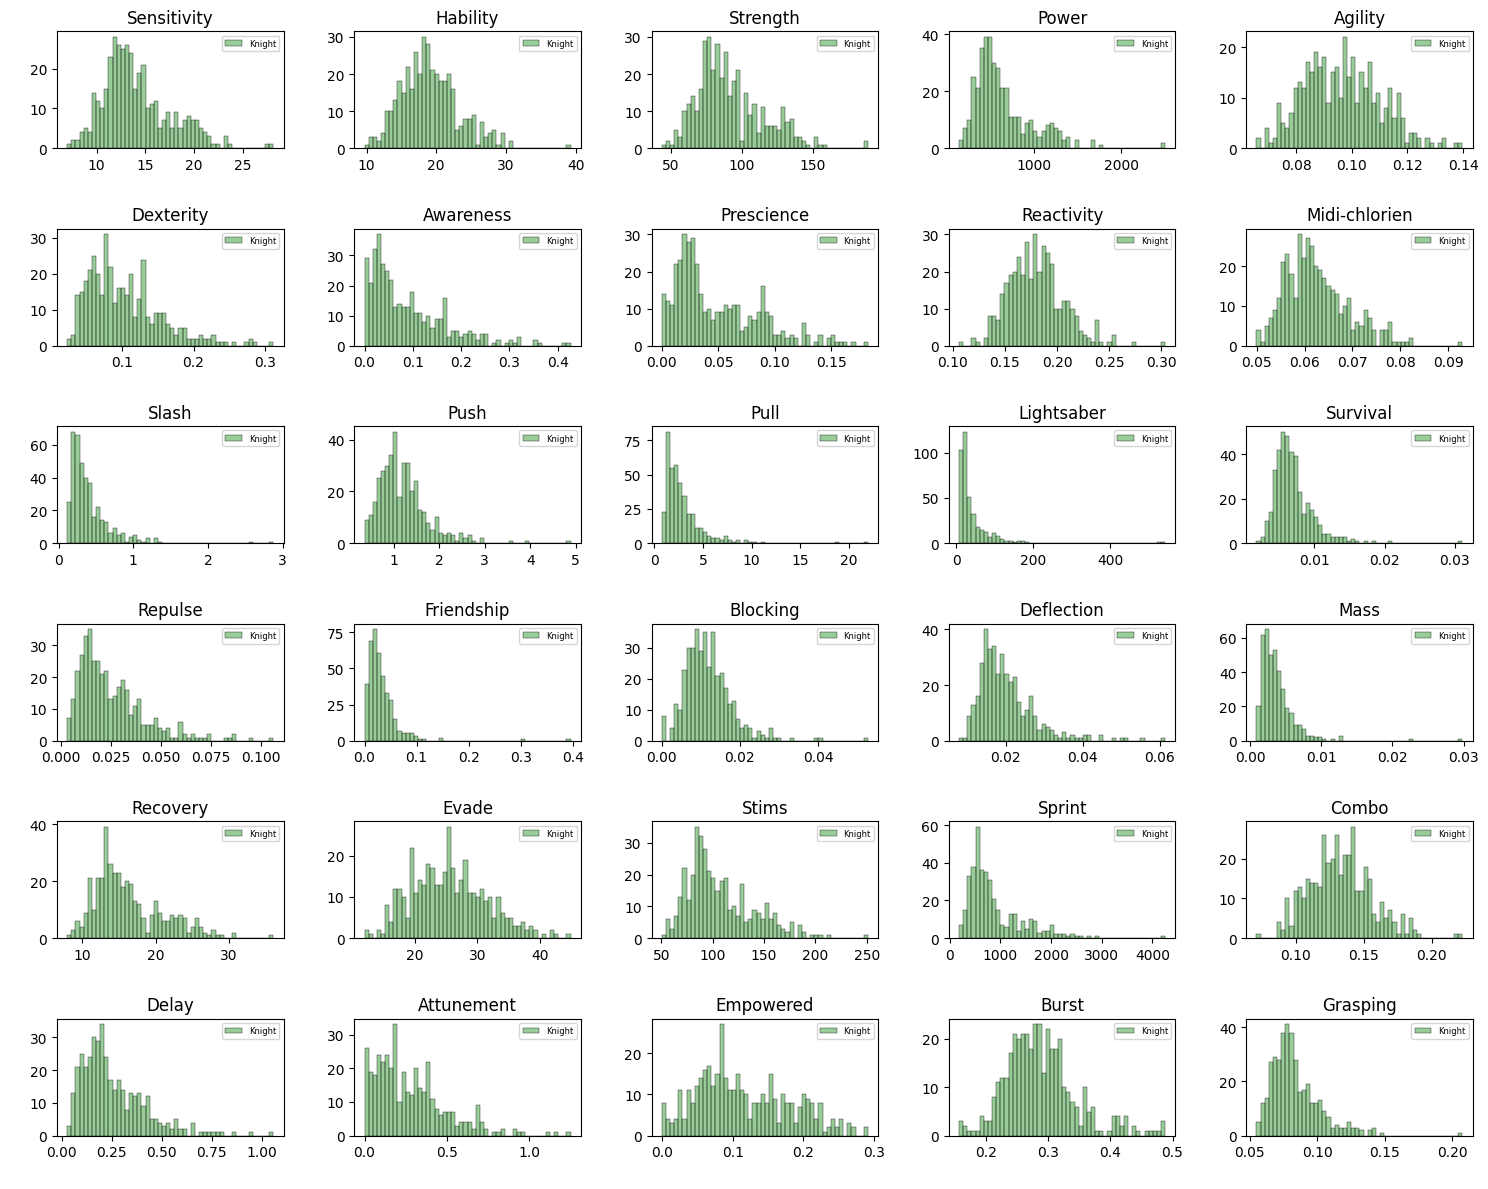

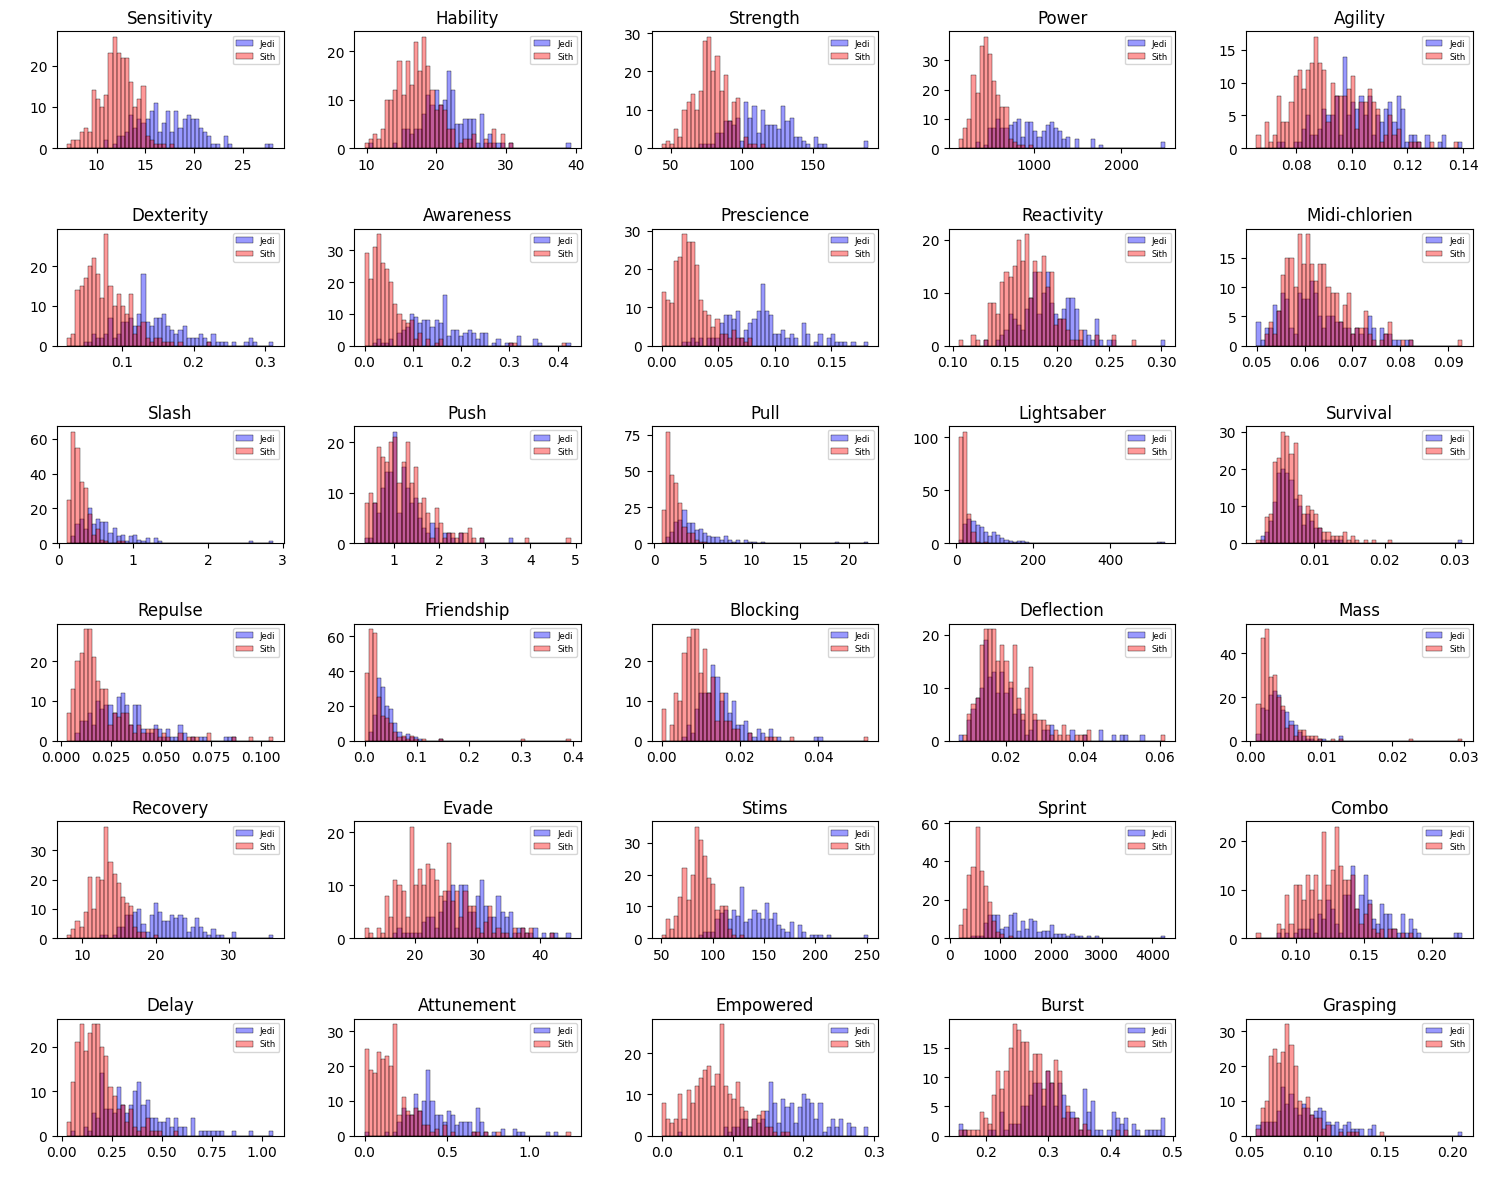

In [11]:

import matplotlib.pyplot as plt
import seaborn as sns


# Select only numeric columns
numeric_cols = df.select_dtypes(include='number').columns

# Set up the grid size
num_items = len(numeric_cols)
cols = 5
rows = (num_items + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(3 * cols, 2 * rows))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.histplot(data=df,
                 x=col,
                 bins=50,
                 ax=axes[i],
                 kde=False,
                 color='green',
                 alpha=0.4)   
    axes[i].set_title(f'{col}')
    axes[i].set_xlabel(' ')
    axes[i].set_ylabel(' ')
    axes[i].legend(['Knight'], loc='upper right', fontsize=6)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()




# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(3 * cols, 2 * rows))
axes = axes.flatten()  # Flatten 2D array of axes to 1D for easy indexing

# Plot each numeric column
for i, col in enumerate(numeric_cols):
    sns.histplot(data=df,
                 x=col,
                 bins=50,
                 ax=axes[i],
                 hue='knight',
                 palette=['red', 'blue'],
                 kde=False,
                 alpha=0.4)   
    axes[i].set_title(f'{col}')
    axes[i].set_xlabel(' ')
    axes[i].set_ylabel(' ')
    axes[i].legend(['Jedi', 'Sith'], loc='upper right', fontsize=6)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

By visually analyzing this data, we can quite easily discern which characteristics offer clearer distinctions between the two types of knights, and which remain shrouded in ambiguity.

For instance, upon careful inspection, we observe that stats like "Agility," (and others such as "Push," "Survival," "Blocking," "Deflection," which might appear in the full dataset) often show distributions that are quite mixed, making it difficult to differentiate between a Jedi and a Sith based solely on these attributes. They overlap considerably, much like shadows converging in a dimly lit alleyway.

On the other hand, certain other stats present more striking contrasts. Attributes such as "Stims," "Sprint," and "Empowered" appear to exhibit notably different patterns between Jedis and Siths, making them far easier to tell apart. These are the bright flares in the darkness, the undeniable fingerprints left at the scene, guiding our deductions.

This visual exploration is paramount, guiding our focus towards the most revealing features and informing our strategy for accurate identification.

---
<br><br>

## Identifying the Strongest Leads: Correlation Analysis

In [12]:
# Convert knight allegiance to a numerical clue (Jedi: 1, Sith: 0).
df['knight_numeric'] = df['knight'].map({'Jedi': 1, 'Sith': 0})

# Identify all numerical attribute columns.
numeric_cols = df.select_dtypes(include='number').columns

# Calculate correlation of each attribute with knight allegiance.
correlations = df[numeric_cols].corrwith(df['knight_numeric'])

# Sort
correlations_sorted = correlations.abs().sort_values(ascending=False)

# Convert sorted correlations into a neat DataFrame report.
corr_df = correlations_sorted.to_frame(name='correlation')

# Rename the column
corr_df = corr_df.reset_index().rename(columns={'index': 'column'})

# Round correlation values
corr_df['correlation'] = corr_df['correlation'].round(6)

# Display the report
print(corr_df.to_string(index=False))

        column  correlation
knight_numeric     1.000000
     Empowered     0.793652
    Prescience     0.790066
         Stims     0.786797
      Recovery     0.777633
        Sprint     0.739672
      Strength     0.737403
   Sensitivity     0.721566
         Power     0.700709
     Awareness     0.699662
    Attunement     0.648893
     Dexterity     0.631987
         Delay     0.598072
         Slash     0.550663
          Pull     0.537800
    Lightsaber     0.515340
         Evade     0.465605
      Hability     0.446632
         Burst     0.445847
         Combo     0.445223
      Blocking     0.421950
       Agility     0.397458
    Reactivity     0.375103
      Grasping     0.350105
       Repulse     0.324399
    Friendship     0.236633
          Mass     0.113185
      Survival     0.043099
    Deflection     0.026489
          Push     0.019446
 Midi-chlorien     0.008132


Beyond visual inspection, a shrewd detective also quantifies relationships. Our next move is to calculate the **correlation** between each of these knight attributes and the ultimate 'knight' classification (Jedi or Sith). This tells us how strongly each stat is linked to their allegiance.

After calculating these correlations, we've meticulously sorted the results. We can clearly see the most significant values at the very top, and the least significant ones at the bottom. By "significant," we mean the attributes that make it easiest to predict whether a knight is a Jedi or a Sith. These highly correlated attributes are our strongest leads, the most telling pieces of evidence.

And to avoid bulking our eyes on just text, a great way to visualize these crucial relationships in a graph is using **Seaborn's scatterplots**. These plots vividly display the connections between our attributes and the knight's allegiance, confirming our strongest leads at a glance.

---
<br><br>

## Unveiling Key Relationships

To truly confirm our suspicions about the most telling attributes, we've zeroed in on two particularly strong indicators: **"Empowered"** and **"Stims"**. We've generated a crucial scatterplot to visualize their relationship.

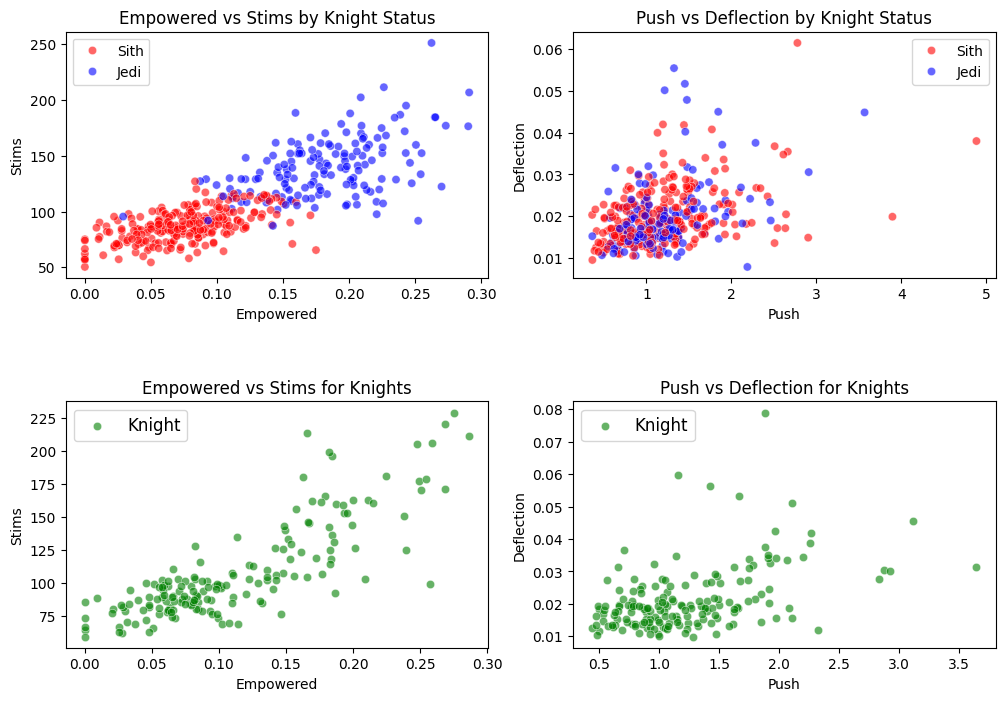

In [13]:

df_train = pd.read_csv('./Knights/Train_knight.csv')
df_test = pd.read_csv('./Knights/Test_knight.csv')

plt.figure(figsize=(12, 8))
plt.subplots_adjust(hspace=0.5)

plt.subplot(2,2,1)
sns.scatterplot(data=df_train, x='Empowered', y='Stims', hue='knight', alpha=0.6, palette={'red', 'blue'})
plt.legend()
plt.title("Empowered vs Stims by Knight Status")

plt.subplot(2,2,2)
sns.scatterplot(data=df_train, x='Push', y='Deflection', hue='knight', alpha=0.6, palette=['red', 'blue'])
plt.legend()
plt.title("Push vs Deflection by Knight Status")


plt.subplot(2,2,3)
sns.scatterplot(data=df_test, x='Empowered', y='Stims', alpha=0.6, color='green')
plt.legend(['Knight'], loc='upper left', fontsize=12)
plt.title("Empowered vs Stims for Knights")

plt.subplot(2,2,4)
sns.scatterplot(data=df_test, x='Push', y='Deflection', alpha=0.6, color='green')
plt.legend(['Knight'], loc='upper left', fontsize=12)
plt.title("Push vs Deflection for Knights")
plt.show()



### Initial Findings: The Training Begins

Upon close examination, a remarkable pattern emerges: **there are very few, if any, overlapping dots** between Jedi and Sith in this space. A knight with high **'Empowered'** skill and high **'Stims'** is highly likely to be a Jedi. This clear separation is a powerful piece of evidence, acting as a distinct signature. In stark contrast, when we look at relationships like **"Push" versus "Deflection"**, the dots are far too mixed; from such a plot, it's virtually impossible to tell the factions apart. This highlights why 'Empowered' and 'Stims' are such compelling leads.

### Verifying Our Findings: Insights from the Testing Data

To ensure our deductions hold true for new, unclassified knights, we've also visualized these patterns within our **testing data**. The next two tables will present the correlation between "Empowered" and "Stims" in this unseen set, allowing us to verify if the clear distinctions we observed persist. A great way to visualize these crucial relationships in a graph is using Seaborn's scatterplots, which will vividly display these correlations in the testing data.

---
<br><br>

## Preparing Our Evidence: Standardization vs. Normalization

Before we proceed with even more sophisticated analytical techniques, it's crucial to ensure our evidence is prepared uniformly. Now, we turn our attention to an important forensic process: understanding the difference between standardizing and normalizing our data. Let's begin by examining the effects of standardization on our knight profiles.

     Sensitivity  Hability  Strength     Power   Agility  Dexterity  \
291     4.099365 -0.155432  4.110430  5.458088  1.308834   0.939700   
232     3.897503  1.724139  4.042438  5.463995  0.881997   1.865967   
73      2.753617  1.242197  2.691101  3.237061  0.771608   0.482453   
319     2.689255  1.820527  2.852581  3.053944  1.301474   2.054361   
203     2.683404  0.704833  2.563616  3.056897 -0.884959   0.211638   
..           ...       ...       ...       ...       ...        ...   
390    -1.719826  0.381932 -1.636154 -1.320476 -0.174056   0.525627   
337    -1.726554 -0.548214 -1.702446 -1.326383 -0.766475  -0.869073   
311    -1.863177  1.536182 -1.860952 -1.394609 -1.135910  -1.078072   
296    -1.874294  1.524133 -1.845653 -1.419418 -0.716432   0.317609   
284    -2.082007 -1.369924 -2.039005 -1.498867  1.514893  -0.550178   

     Awareness  Prescience  Reactivity  Midi-chlorien  ...  Recovery  \
291   2.923992    2.936989   -0.577638      -1.112198  ...  2.554105   
232

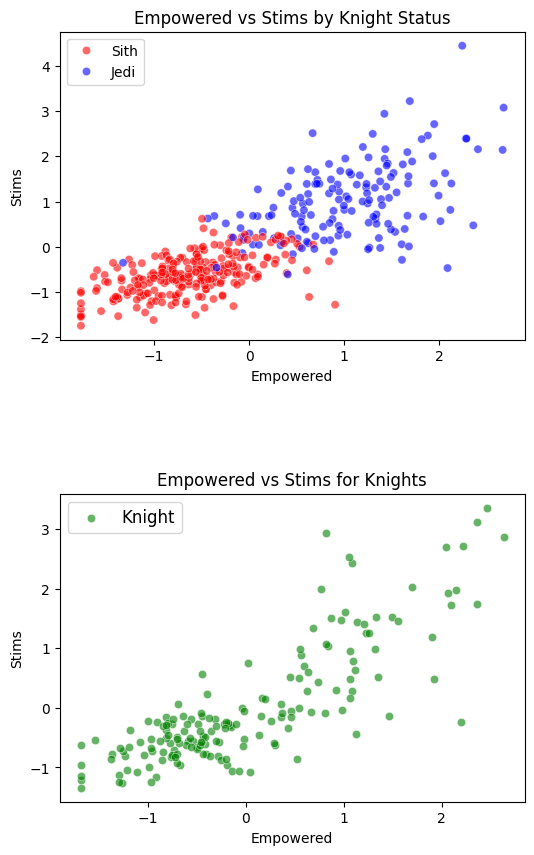

In [14]:
from sklearn.preprocessing import StandardScaler


numeric_cols_train = df_train.select_dtypes(include='number').columns
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_train[numeric_cols_train])
X_scaled_df = pd.DataFrame(X_scaled, columns=numeric_cols_train)
print(X_scaled_df.sort_values(by='Sensitivity', ascending=False))

X_scaled_df['knight'] = df_train['knight']

plt.figure(figsize=(6, 10))
plt.subplots_adjust(hspace=0.5)

plt.subplot(2, 1, 1)
sns.scatterplot(data=X_scaled_df, x='Empowered', y='Stims', hue='knight', alpha=0.6, palette=['red', 'blue'])
plt.legend()
plt.title("Empowered vs Stims by Knight Status")


numeric_cols_train = df_test.select_dtypes(include='number').columns
plt.subplot(2, 1, 2)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_test[numeric_cols_train])
X_scaled_df = pd.DataFrame(X_scaled, columns=numeric_cols_train)

print(X_scaled_df.sort_values(by='Sensitivity', ascending=False))

sns.scatterplot(data=X_scaled_df, x='Empowered', y='Stims', alpha=0.6, color='green')
plt.legend(['Knight'], loc='upper left', fontsize=12)
plt.title("Empowered vs Stims for Knights")
plt.show()

### Preparing Our Evidence: Standardizing the Clues

In our detective work, evidence comes in all shapes and sizes. Some knight attributes, like 'Strength', might naturally have large numerical values, while 'Agility' might be much smaller. If we don't adjust for this, the larger values could unfairly dominate our analysis, like a loud voice drowning out a crucial whisper.

This is where **standardization** comes in. It's a vital forensic step that transforms our data. Think of it as leveling the playing field for all our clues:

- Each attribute is centered around a **mean of 0**.

- Its spread is adjusted to a **standard deviation of 1**.

The plots you see, with values ranging consistently from about **-2 to 3 on both axes**, are the direct result of this process. It means whether we're looking at the training set (Jedis in blue, Siths in red) or the testing set (all knights in green), all their attributes are now uniformly scaled. This ensures our models can analyze every piece of evidence fairly, preventing bias and leading to more accurate deductions.

     Sensitivity  Hability  Strength     Power   Agility  Dexterity  \
291     1.000000  0.296246  1.000000  0.999152  0.654241   0.445062   
232     0.967343  0.560027  0.988943  1.000000  0.575905   0.608973   
73      0.782290  0.492391  0.769194  0.680170  0.555646   0.364148   
319     0.771878  0.573554  0.795453  0.653871  0.652890   0.642311   
203     0.770931  0.416977  0.748462  0.654295  0.251621   0.316224   
..           ...       ...       ...       ...       ...        ...   
390     0.058592  0.371660  0.065510  0.025620  0.382091   0.371788   
337     0.057504  0.241123  0.054730  0.024772  0.273366   0.124983   
311     0.035402  0.533649  0.028954  0.014973  0.205565   0.087998   
296     0.033603  0.531958  0.031442  0.011410  0.282550   0.334977   
284     0.000000  0.125803  0.000000  0.000000  0.692058   0.181414   

     Awareness  Prescience  Reactivity  Midi-chlorien  ...  Recovery  \
291   0.750704    0.874931    0.296970       0.123023  ...  0.717894   
232

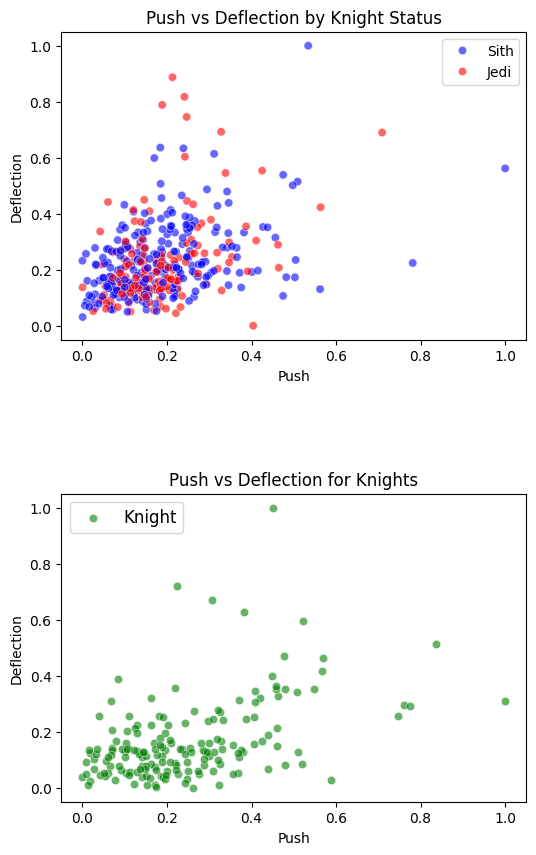

In [15]:
from sklearn.preprocessing import MinMaxScaler

numeric_cols_train = df_train.select_dtypes(include='number').columns
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df_train[numeric_cols_train])
X_scaled_df = pd.DataFrame(X_scaled, columns=numeric_cols_train)
print(X_scaled_df.sort_values(by='Sensitivity', ascending=False))

X_scaled_df['knight'] = df_train['knight']

plt.figure(figsize=(6, 10))
plt.subplots_adjust(hspace=0.5)

plt.subplot(2, 1, 1)
sns.scatterplot(data=X_scaled_df, x='Push', y='Deflection', hue='knight', alpha=0.6, palette=['blue', 'red'])
plt.legend()
plt.title("Push vs Deflection by Knight Status")


numeric_cols_train = df_test.select_dtypes(include='number').columns
plt.subplot(2, 1, 2)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df_test[numeric_cols_train])
X_scaled_df = pd.DataFrame(X_scaled, columns=numeric_cols_train)

print(X_scaled_df.sort_values(by='Sensitivity', ascending=False))

sns.scatterplot(data=X_scaled_df, x='Push', y='Deflection', alpha=0.6, color='green')
plt.legend(['Knight'], loc='upper left', fontsize=12)
plt.title("Push vs Deflection for Knights")
plt.show()

### Another Forensic Method: The Art of Normalization

While standardization centers our evidence, **normalization** offers a different approach to preparing our clues. Think of it as **fitting every piece of evidence precisely into a predefined container**, ensuring no single detail exceeds its designated boundaries.

This technique transforms our attributes so their values are scaled to a fixed range, typically **between 0 and 1**. This is particularly useful for certain analytical tools that prefer inputs within such strict boundaries.

By normalizing our data:

- **We standardize the 'size' of every clue**: Regardless of its original scale, every attribute now fits neatly within a consistent, precise range.

- **We enhance compatibility**: This method is vital for algorithms where input magnitudes can significantly impact their deductions, ensuring every clue is presented in a consistent format.

Normalization, like standardization, is about ensuring fairness and consistency in our investigation, allowing our tools to weigh every piece of evidence accurately in their quest for the truth.

---
<br><br>

## The Detective's Toolkit: Training, Validation, and Testing

In any rigorous investigation, we must ensure our methods are sound. This involves splitting our Train_knight.csv evidence to properly prepare our 'detective' (our machine learning model)

In [16]:
from sklearn.model_selection import train_test_split

train_df, val_df = train_test_split(df_train, test_size=0.2, random_state=42, shuffle=True)

train_df.to_csv('Training_knight.csv', index=False)
val_df.to_csv('Validation_knight.csv', index=False)

print(f"Training set: {len(train_df)} rows ({len(train_df)/len(df)*100:.2f}%)")
print(f"Validation set: {len(val_df)} rows ({len(val_df)/len(df)*100:.2f}%)")


Training set: 318 rows (79.90%)
Validation set: 80 rows (20.10%)


- **Training Set (Study Material)**: This is the bulk of our known evidence, where our detective learns the patterns of Jedi and Sith.

- **Validation Set (Practice Drills)**: A crucial, separate portion of known evidence used for fine-tuning. Here, we're using an 80/20 split (20% for validation). This is key, especially if our data is relatively scarce, to prevent overtraining. An overtrained detective has simply memorized past cases and will fail to generalize to new, unseen evidence. The validation set ensures our detective truly understands, not just remembers.

- **Testing Set (The Final Exam)**: Our Test_knight.csv is untouched, pristine evidence used only at the very end. This is the ultimate, unbiased test of our detective's ability to classify genuinely new knights in the field.